# P1 

# Time Series Analysis

Presentado por:

Diego Alejandro Diaz - 202027745 Andres Felipe Botero - 201421261 Sindy Carolina Niño - 202020034 Juliana López Botero - 202027785

Para el desarrollo de este proyecto se utilizó una serie de datos compuesta por las ventas diarias entre Agosto de 2019 y Mayo de 2021 de un retail en centro ameríca. El objetivo es predecir el valor de las ventas de los próximos 6 meses a partir de la información disponible.

Este proyecto es muy importante para el área de riesgo de la compañia debido a que el pronóstico de ventas es el insumo principal para la estimación de la rentabilidad del proyecto, así como para estimación de los indicadores de cartera vencida y pérdida esperada, que afectan directamente el PyG. Un pronostico acertado permitrá entonces establecer metas y estimaciones para evaluar el desempeño del proyecto de manera que se puedan cumplir las expectativas de rentabilidad y riesgo esperadas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
data = pd.read_excel("C:/Users/ddiaz/OneDrive - Universidad de los Andes/Intersemestral/Modelos analíticos avanzados/Serie de tiempo retail.xlsx")

In [6]:
data["total_compra"]=data["total_compra"].round(3)

In [8]:
data.fechaventa = pd.to_datetime(data.fechaventa)

In [9]:
data.set_index('fechaventa', inplace=True)

Se construye una gráfica para observar el comportamiento de las ventas a través del periodo estudiado

<AxesSubplot:xlabel='fechaventa'>

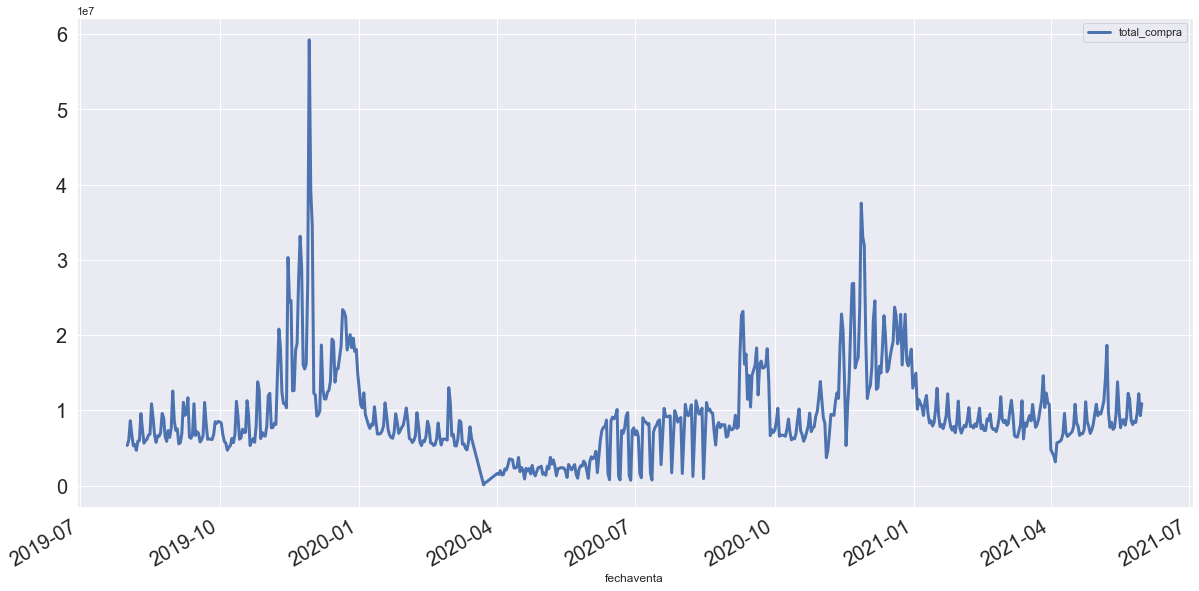

In [10]:
data.plot(figsize=(20,10), linewidth=3, fontsize=20)

Se ve que las ventas tienen dos picos bastante grandes en los últimos dos meses de 2019 y 2020, esto corresponde con la naturaleza del sector debido a la temporada de fin de año. Se realizarán análisis de tendencia, correlación y estacionalidad para poder entender mejor la serie.

<AxesSubplot:xlabel='fechaventa'>

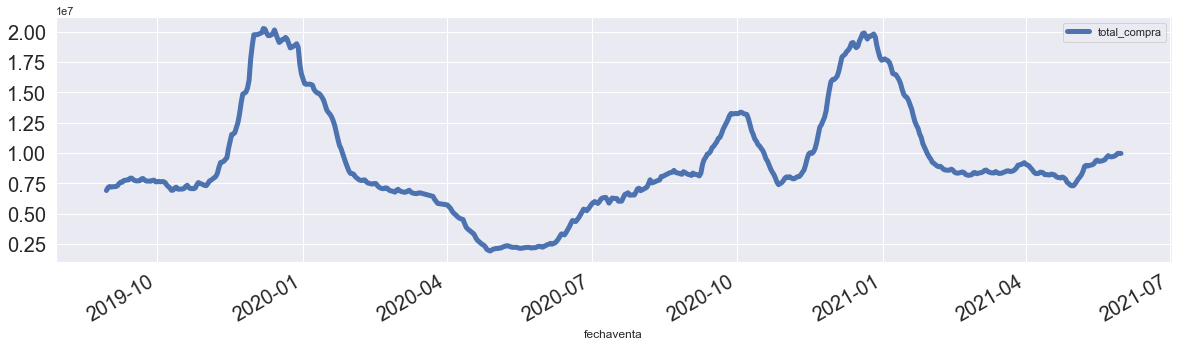

In [20]:
data.rolling(30).mean().plot(figsize=(20,5), linewidth=5, fontsize=20)

La gráfica muestra que las ventas se encuentran actualmente en los mismos niveles que en agosto de 2019, se evidencia además el impacto de los cierres por pandemia entre mayo y julio de 2020

<AxesSubplot:xlabel='fechaventa'>

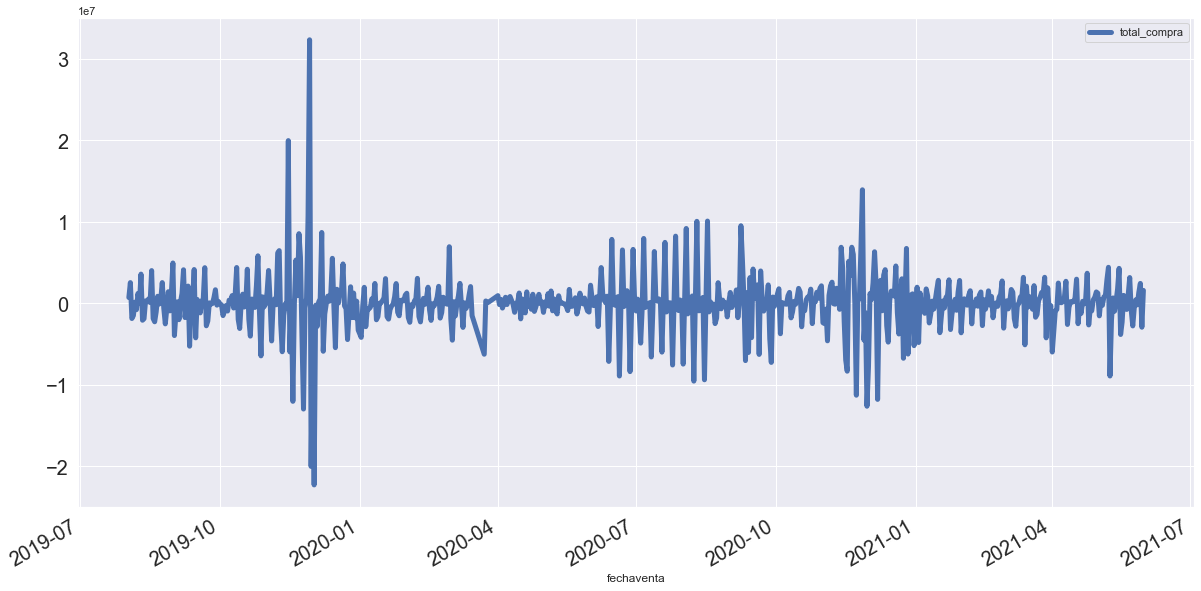

In [12]:
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)

Se observa que el nivel de ventas de fin de año de 2019 es muy superior al observado en el resto de la serie

Para evaluar estacionalidad se realiza el test de Dicky-Fuller sobre la serie

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.113643
p-value: 0.025560
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [24]:
result = adfuller(data.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.827221
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


El resultado muestra que la serie completa no tiene estacionalidad.

Aplicando la gráfica de autocorrelación se observa que no hay un patrón claro definido en la serie, por lo que no se puede confirmar que exista correlación entre los periodos de tiempo estudiados

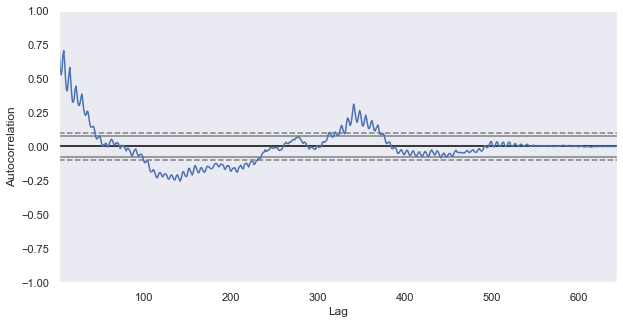

In [16]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(data);

FInalmente, se realizan las gráficas de autocorrelación parcial y completa para evaluar el tipo de modelo a construir

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

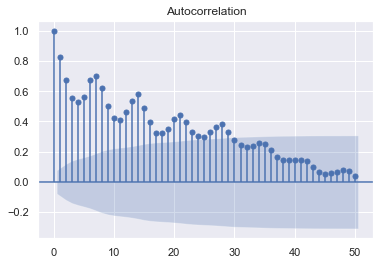

In [29]:
plot_acf(data, lags=50)

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

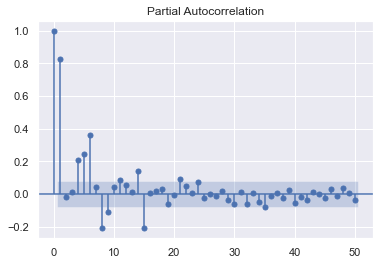

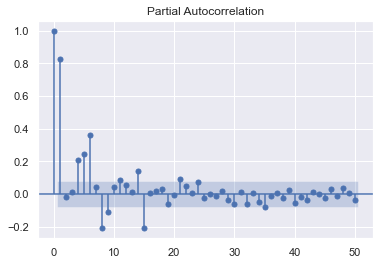

In [30]:
plot_pacf(data, lags=50)

Se utilizará la libreria prophet para construir el modelo que nos permita pronosticar los siguientes 6 meses de ventas

In [31]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [32]:
df = pd.read_excel("C:/Users/ddiaz/OneDrive - Universidad de los Andes/Intersemestral/Modelos analíticos avanzados/Serie de tiempo retail.xlsx")

In [33]:
df.fechaventa = pd.to_datetime(df.fechaventa)

In [35]:
df.columns = ['ds','y']

In [43]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Se crean los siguientes puntos de observación a pronosticar

In [44]:
future = m.make_future_dataframe(periods=180, freq='D')

In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
819,2021-11-23,5.978369e+05,-7.615446e+06,8.395188e+06
820,2021-11-24,6.393490e+05,-7.428101e+06,8.974825e+06
821,2021-11-25,8.886851e+05,-7.139232e+06,1.001191e+07
822,2021-11-26,2.546397e+06,-5.746213e+06,1.115934e+07
823,2021-11-27,3.491054e+06,-5.227811e+06,1.158699e+07


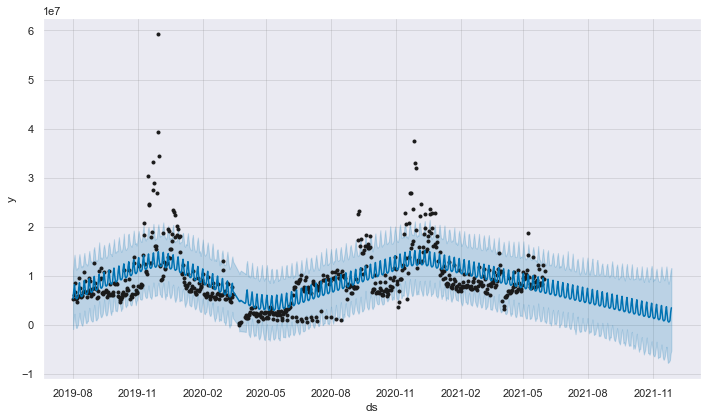

In [46]:
fig1 = m.plot(forecast)

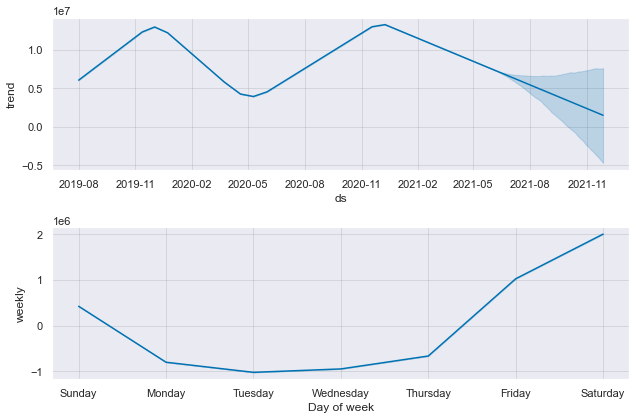

In [42]:
m.plot_components(forecast);

Los resultados muestran que la proyección de los siguientes 6 meses presenta altas fluctuaciones respecto al resto de la serie. Esto puede explicarse debido a la alta volatilidad en ventas que se presentaron a raíz de la pandemia así como de un alto historico de ventas a finales del 2019

Se realizará una prueba del pronóstico teniendo en cuenta un periodo de observación más corto, excluyendo 2019 y tratando de pronósticar los siguientes 3 meses de ventas

In [49]:
df2= df[(df['ds'] > '2019-12-31')]

In [50]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods=90, freq='D')

In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
577,2021-08-25,3.680246e+06,-1.407085e+06,8.580960e+06
578,2021-08-26,3.793788e+06,-1.221089e+06,8.910226e+06
579,2021-08-27,4.859054e+06,2.663297e+04,1.004365e+07
580,2021-08-28,5.333532e+06,3.614534e+04,9.972701e+06
581,2021-08-29,3.804210e+06,-1.095843e+06,8.705444e+06


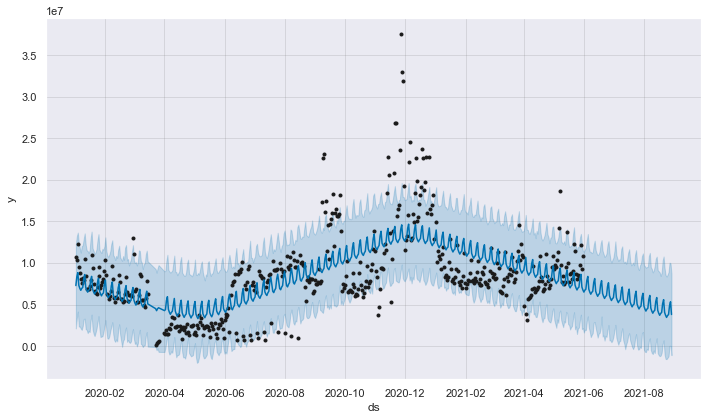

In [53]:
fig2 = m.plot(forecast)

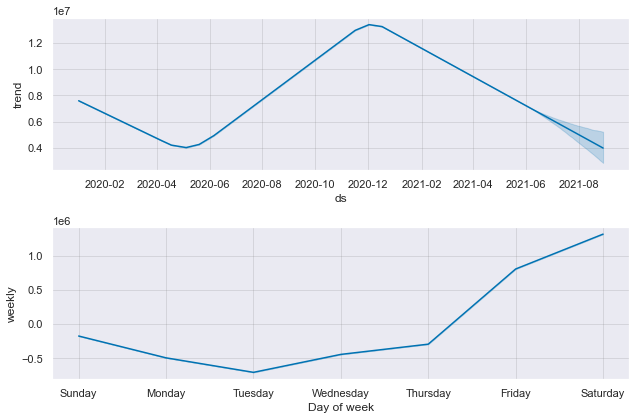

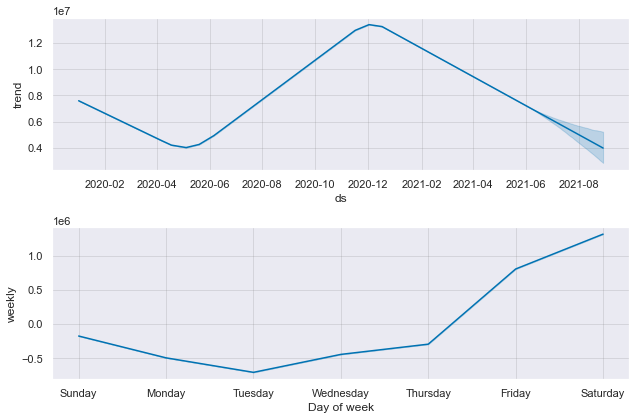

In [54]:
m.plot_components(forecast)

Finalmente, se observa una mejoría en el modelo, sin embargo el resultado aún presenta fluctuaciones en la predicción.

**Conclusiones**

- La serie de tiempo no es estacional en su totalidad, sin embargo se observa que las ventas tienen un incremento los sábados y presentan el nivel más bajo los domingos
- No se pudo lograr un buen pronóstico debido a la cantidad de valores atípicos dentro del periodo observado
- Se obtuvieron mejores resultados al evaluar la serie sin los altos valores de finales de 2019 y prediciendo un horizonte de tiempo más corto (3 meses) 